In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/depression-and-anxiety-data/depression_anxiety_data.csv


# Data Preprocessing

In [132]:
df = pd.read_csv('/kaggle/input/depression-and-anxiety-data/depression_anxiety_data.csv')
df.head()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


In [133]:
df.shape

(783, 19)

In [6]:
df.columns

Index(['id', 'school_year', 'age', 'gender', 'bmi', 'who_bmi', 'phq_score',
       'depression_severity', 'depressiveness', 'suicidal',
       'depression_diagnosis', 'depression_treatment', 'gad_score',
       'anxiety_severity', 'anxiousness', 'anxiety_diagnosis',
       'anxiety_treatment', 'epworth_score', 'sleepiness'],
      dtype='object')

In [134]:
#Check for missing values
def check_missing_values(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    return missing

missing_values = check_missing_values(df)
print("Missing Values:\n", missing_values)

Missing Values:
 depression_severity     4
depressiveness          3
suicidal                1
depression_diagnosis    1
depression_treatment    4
anxiousness             6
anxiety_diagnosis       4
anxiety_treatment       2
epworth_score           8
sleepiness              8
dtype: int64


In [135]:
# Handle Missing Values
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].mean(), inplace=True)
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


Downca

In [136]:
#Re-check for missing values
def check_missing_values(df):
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    return missing

missing_values = check_missing_values(df)
print("Missing Values:\n", missing_values)

Missing Values:
 Series([], dtype: int64)


In [137]:
# Final Check
df.apply(lambda x: x == '').sum()

id                      0
school_year             0
age                     0
gender                  0
bmi                     0
who_bmi                 0
phq_score               0
depression_severity     0
depressiveness          0
suicidal                0
depression_diagnosis    0
depression_treatment    0
gad_score               0
anxiety_severity        0
anxiousness             0
anxiety_diagnosis       0
anxiety_treatment       0
epworth_score           0
sleepiness              0
dtype: int64

In [11]:
df.dtypes

id                        int64
school_year               int64
age                       int64
gender                   object
bmi                     float64
who_bmi                  object
phq_score                 int64
depression_severity      object
depressiveness             bool
suicidal                   bool
depression_diagnosis       bool
depression_treatment       bool
gad_score                 int64
anxiety_severity         object
anxiousness                bool
anxiety_diagnosis          bool
anxiety_treatment          bool
epworth_score           float64
sleepiness                 bool
dtype: object

In [138]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Encode Categorical Variables
label_encoders = {}
categorical_cols = ['gender', 'who_bmi', 'depression_severity', 'anxiety_severity']
for col in categorical_cols:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

In [139]:
# Convert Boolean Columns to Integer
df[['depressiveness', 'suicidal', 'depression_diagnosis', 'depression_treatment', 'anxiousness', 'anxiety_diagnosis', 'anxiety_treatment', 'sleepiness']] = df[['depressiveness', 'suicidal', 'depression_diagnosis', 'depression_treatment', 'anxiousness', 'anxiety_diagnosis', 'anxiety_treatment', 'sleepiness']].astype(int)

In [140]:
# Normalize Numerical Features
scaler = StandardScaler()
numerical_cols = ['bmi', 'phq_score', 'gad_score', 'epworth_score']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [142]:
df.drop(columns=["id", "school_year"], inplace=True)

In [144]:
df.columns

Index(['age', 'gender', 'bmi', 'who_bmi', 'phq_score', 'depression_severity',
       'depressiveness', 'suicidal', 'depression_diagnosis',
       'depression_treatment', 'gad_score', 'anxiety_severity', 'anxiousness',
       'anxiety_diagnosis', 'anxiety_treatment', 'epworth_score',
       'sleepiness'],
      dtype='object')

In [143]:
df.head()

,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,19,1,2.173519,0,0.424101,0,0,0,0,0,0.886690,2,1,0,0,0.156849,0
1,18,1,-0.784803,3,0.198049,0,0,0,0,0,-0.383331,1,0,0,0,1.918561,1
2,19,1,0.368771,5,0.198049,0,0,0,0,0,-0.171661,1,0,0,0,-0.094824,0
3,18,0,0.069754,3,2.684625,2,1,1,0,0,1.733370,4,1,0,0,1.163542,1
4,18,1,0.481668,5,-0.254056,0,0,0,0,0,1.521700,2,1,0,0,-0.849843,0


# EDA

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [31]:
# EDA - Summary Statistics
print(df.describe())

              age      gender           bmi     who_bmi     phq_score  \
count  783.000000  783.000000  7.830000e+02  783.000000  7.830000e+02   
mean    20.233716    0.485313 -7.940292e-18    3.512133 -9.074620e-18   
std      1.767217    0.500104  1.000639e+00    1.220894  1.000639e+00   
min     18.000000    0.000000 -5.135277e+00    0.000000 -1.610371e+00   
25%     19.000000    0.000000 -5.330553e-01    3.000000 -7.061613e-01   
50%     20.000000    0.000000 -6.140198e-02    3.000000 -2.540564e-01   
75%     21.000000    1.000000  4.603208e-01    5.000000  4.241010e-01   
max     31.000000    1.000000  6.826153e+00    6.000000  3.814888e+00   

       depression_severity  depressiveness    suicidal  depression_diagnosis  \
count           783.000000      783.000000  783.000000            783.000000   
mean              1.309068        0.269476    0.088123              0.084291   
std               1.415662        0.443971    0.283654              0.278002   
min               0.00

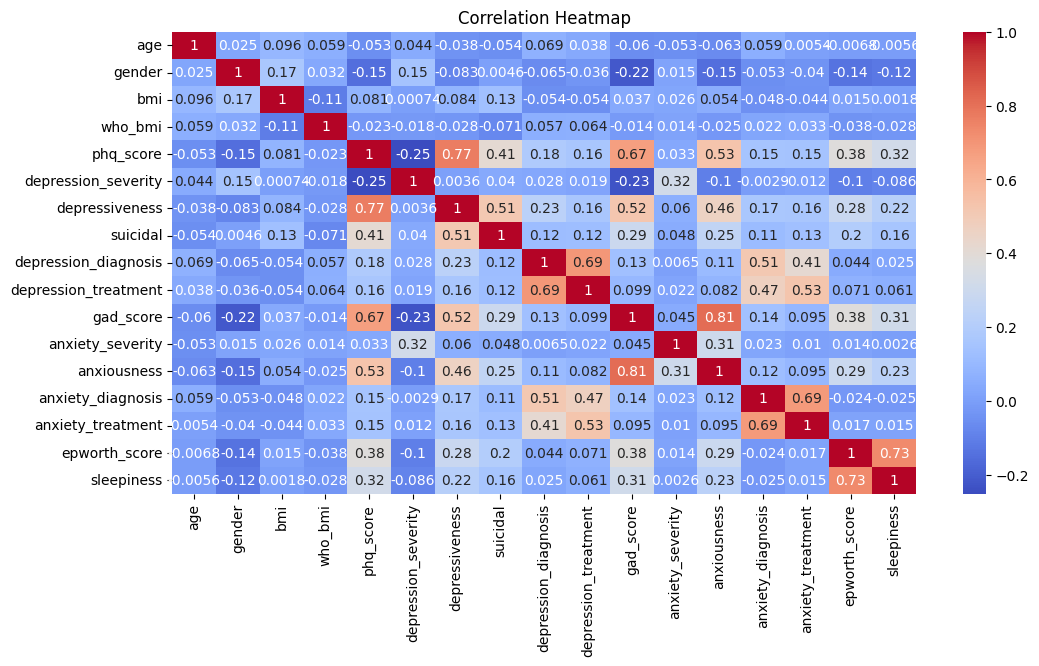

In [32]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

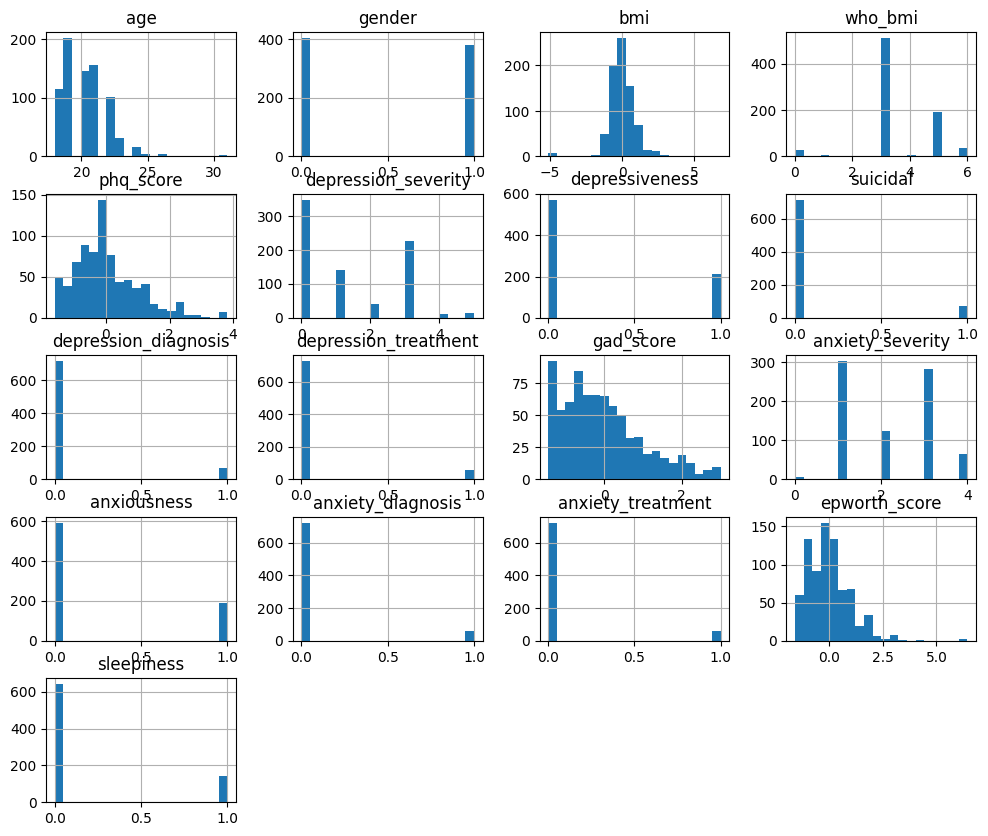

In [33]:
df.hist(figsize=(12, 10), bins=20)
plt.show()

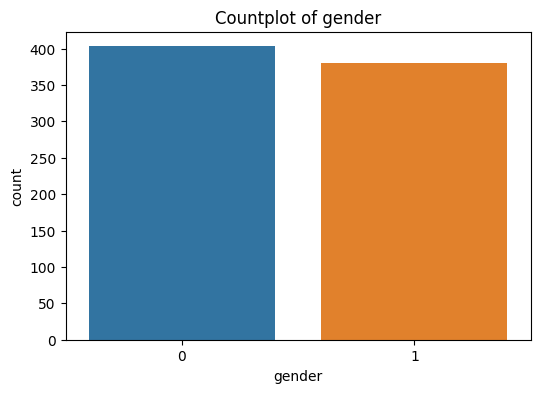

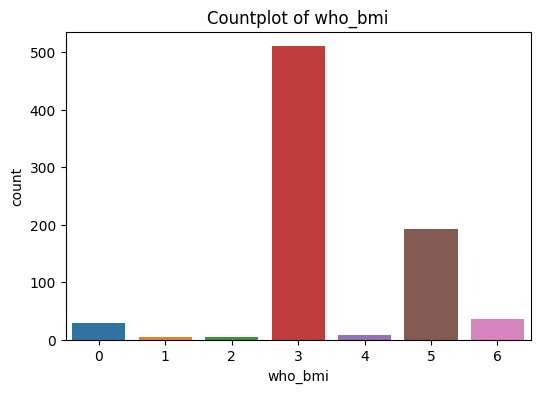

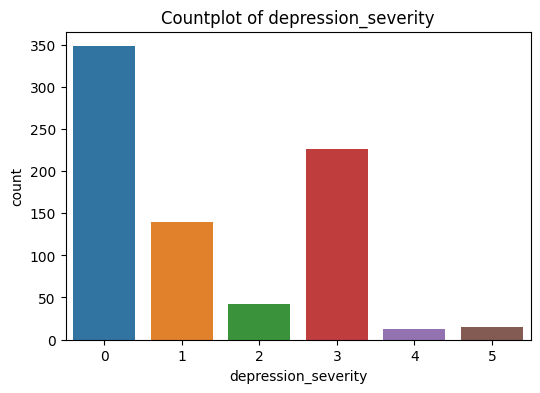

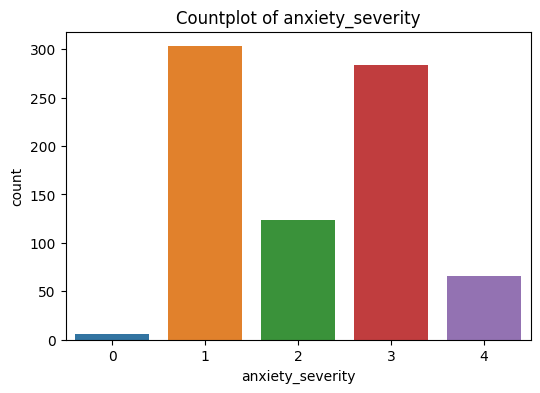

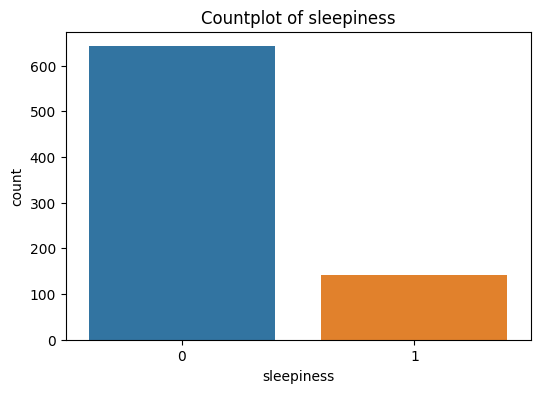

In [34]:
categorical_vars = ['gender', 'who_bmi', 'depression_severity', 'anxiety_severity', 'sleepiness']
for col in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")
    plt.show()

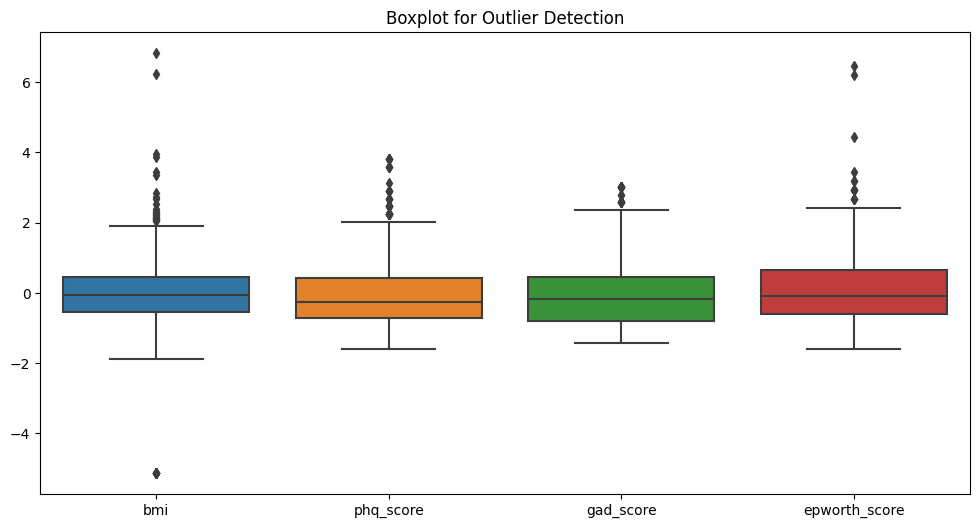

In [35]:
# Outlier Detection using Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.title("Boxplot for Outlier Detection")
plt.show()

# Model Training

**First Model**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

In [100]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for bmi_category
label_encoder = LabelEncoder()
df['bmi_category'] = label_encoder.fit_transform(df['bmi_category'])

# Repeat for the input data if necessary (for prediction)
input_df['bmi_category'] = label_encoder.transform(input_df['bmi_category'])


In [101]:
# Define features and targets
# Convert categorical features to numerical
X = pd.get_dummies(df.drop(columns=["depression_severity", "anxiety_severity"]))
y = df[["depression_severity", "anxiety_severity"]]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'who_bmi' is categorical
label_encoder = LabelEncoder()
df["who_bmi"] = label_encoder.fit_transform(df["who_bmi"])

In [108]:
# Define separate models for each target
rf_depression_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_anxiety_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [109]:
# Train models
rf_depression_model.fit(X_train, y_train["depression_severity"])
rf_anxiety_model.fit(X_train, y_train["anxiety_severity"])

RandomForestClassifier(random_state=42)

In [110]:
# Predict on test data
y_pred_depression = rf_depression_model.predict(X_test)
y_pred_anxiety = rf_anxiety_model.predict(X_test)

In [111]:
from sklearn.metrics import accuracy_score
# Evaluate models
depression_accuracy = accuracy_score(y_test["depression_severity"], y_pred_depression)
anxiety_accuracy = accuracy_score(y_test["anxiety_severity"], y_pred_anxiety)

print(f"Depression severity model accuracy: {depression_accuracy:.4f}")
print(f"Anxiety severity model accuracy: {anxiety_accuracy:.4f}")


Depression severity model accuracy: 0.9809
Anxiety severity model accuracy: 0.9873


**2nd Model**

In [145]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb


In [146]:
# Defining your features (X) and target variables (y)
X = df.drop(columns=['depression_severity', 'anxiety_severity'])  # Drop target columns
y_depression = df['depression_severity']
y_anxiety = df['anxiety_severity']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_depression_train, y_depression_test = train_test_split(X, y_depression, test_size=0.2, random_state=42)
X_train, X_test, y_anxiety_train, y_anxiety_test = train_test_split(X, y_anxiety, test_size=0.2, random_state=42)


In [147]:
# Initialize XGBoost model
xgb_model_depression = xgb.XGBClassifier(objective='multi:softmax', num_class=6, eval_metric='mlogloss')
xgb_model_anxiety = xgb.XGBClassifier(objective='multi:softmax', num_class=5, eval_metric='mlogloss')

# Fit the models
xgb_model_depression.fit(X_train, y_depression_train)
xgb_model_anxiety.fit(X_train, y_anxiety_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, num_parallel_tree=None, ...)

In [148]:
# Predicting on the test set
y_depression_pred = xgb_model_depression.predict(X_test)
y_anxiety_pred = xgb_model_anxiety.predict(X_test)

# Accuracy for Depression Severity model
depression_accuracy = accuracy_score(y_depression_test, y_depression_pred)
print(f"Depression Severity Model Accuracy: {depression_accuracy:.4f}")

# Accuracy for Anxiety Severity model
anxiety_accuracy = accuracy_score(y_anxiety_test, y_anxiety_pred)
print(f"Anxiety Severity Model Accuracy: {anxiety_accuracy:.4f}")

# Classification Reports
print("\nDepression Severity Classification Report:")
print(classification_report(y_depression_test, y_depression_pred))

print("\nAnxiety Severity Classification Report:")
print(classification_report(y_anxiety_test, y_anxiety_pred))

# Confusion Matrices
print("\nDepression Severity Confusion Matrix:")
print(confusion_matrix(y_depression_test, y_depression_pred))

print("\nAnxiety Severity Confusion Matrix:")
print(confusion_matrix(y_anxiety_test, y_anxiety_pred))


Depression Severity Model Accuracy: 1.0000
Anxiety Severity Model Accuracy: 0.9809

Depression Severity Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3

    accuracy                           1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157


Anxiety Severity Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        24
           3       0.96      0.98      0.97        53
           4      

In [149]:
import joblib

# Save the models
joblib.dump(xgb_model_depression, 'xgb_model_depression.pkl')
joblib.dump(xgb_model_anxiety, 'xgb_model_anxiety.pkl')


['xgb_model_anxiety.pkl']

# Testing

In [ ]:
import pandas as pd
import joblib

# Load the trained model
xgb_model_depression = joblib.load('xgb_model_depression.pkl')
xgb_model_anxiety = joblib.load('xgb_model_anxiety.pkl')

# Depression and Anxiety Severity Class Mappings
depression_classes = {
    0: "No Depression",
    1: "Mild Depression",
    2: "Moderate Depression",
    3: "Severe Depression",
    4: "Very Severe Depression",
    5: "Extreme Depression"
}

anxiety_classes = {
    0: "No Anxiety",
    1: "Mild Anxiety",
    2: "Moderate Anxiety",
    3: "Severe Anxiety",
    4: "Extreme Anxiety"
}

def predict_depression_severity(input_data):
    # Ensure the input is a DataFrame
    input_df = pd.DataFrame([input_data])
    prediction = xgb_model_depression.predict(input_df)
    return depression_classes[prediction[0]]

def predict_anxiety_severity(input_data):
    # Ensure the input is a DataFrame
    input_df = pd.DataFrame([input_data])
    prediction = xgb_model_anxiety.predict(input_df)
    return anxiety_classes[prediction[0]]

# Example usage
input_data = {
    'age': 19,
    'gender': 1,
    'bmi': 2.17,
    'who_bmi': 0,
    'phq_score': 0.42,
    'depressiveness': 0,
    'suicidal': 0,
    'depression_diagnosis': 0,
    'depression_treatment': 0,
    'gad_score': 0.88,
    'anxiousness': 2,
    'anxiety_diagnosis': 1,
    'anxiety_treatment': 0,
    'epworth_score': 0.16,
    'sleepiness': 0
}

# Predicting depression and anxiety severity
depression_pred = predict_depression_severity(input_data)
anxiety_pred = predict_anxiety_severity(input_data)

print(f"Predicted Depression Severity: {depression_pred}")
print(f"Predicted Anxiety Severity: {anxiety_pred}")


In [152]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 MB 30.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 94.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [ ]:
import gradio as gr
import pandas as pd
import joblib

# Load the trained model
xgb_model_depression = joblib.load('xgb_model_depression.pkl')
xgb_model_anxiety = joblib.load('xgb_model_anxiety.pkl')

# Depression and Anxiety Severity Class Mappings
depression_classes = {
    0: "No Depression",
    1: "Mild Depression",
    2: "Moderate Depression",
    3: "Severe Depression",
    4: "Very Severe Depression",
    5: "Extreme Depression"
}

anxiety_classes = {
    0: "No Anxiety",
    1: "Mild Anxiety",
    2: "Moderate Anxiety",
    3: "Severe Anxiety",
    4: "Extreme Anxiety"
}

# Prediction functions
def predict_depression_severity(age, gender, bmi, who_bmi, phq_score, depressiveness, suicidal, depression_diagnosis, depression_treatment, gad_score, anxiousness, anxiety_diagnosis, anxiety_treatment, epworth_score, sleepiness):
    # Convert categorical values to numeric
    gender = 0 if gender == "Male" else 1
    suicidal = int(suicidal)  # Convert to int (0 or 1)
    depression_diagnosis = int(depression_diagnosis)  # Convert to int (0 or 1)
    depression_treatment = int(depression_treatment)  # Convert to int (0 or 1)
    anxiety_diagnosis = int(anxiety_diagnosis)  # Convert to int (0 or 1)
    anxiety_treatment = int(anxiety_treatment)  # Convert to int (0 or 1)
    sleepiness = int(sleepiness)  # Convert to int (0 or 1)

    input_data = {
        'age': age,
        'gender': gender,
        'bmi': bmi,
        'who_bmi': who_bmi,
        'phq_score': phq_score,
        'depressiveness': depressiveness,
        'suicidal': suicidal,
        'depression_diagnosis': depression_diagnosis,
        'depression_treatment': depression_treatment,
        'gad_score': gad_score,
        'anxiousness': anxiousness,
        'anxiety_diagnosis': anxiety_diagnosis,
        'anxiety_treatment': anxiety_treatment,
        'epworth_score': epworth_score,
        'sleepiness': sleepiness
    }
    
    # Ensure the input is a DataFrame
    input_df = pd.DataFrame([input_data])
    prediction = xgb_model_depression.predict(input_df)
    
    # Map prediction to readable class
    return depression_classes[prediction[0]]

def predict_anxiety_severity(age, gender, bmi, who_bmi, phq_score, depressiveness, suicidal, depression_diagnosis, depression_treatment, gad_score, anxiousness, anxiety_diagnosis, anxiety_treatment, epworth_score, sleepiness):
    # Convert categorical values to numeric
    gender = 0 if gender == "Male" else 1
    suicidal = int(suicidal)  # Convert to int (0 or 1)
    depression_diagnosis = int(depression_diagnosis)  # Convert to int (0 or 1)
    depression_treatment = int(depression_treatment)  # Convert to int (0 or 1)
    anxiety_diagnosis = int(anxiety_diagnosis)  # Convert to int (0 or 1)
    anxiety_treatment = int(anxiety_treatment)  # Convert to int (0 or 1)
    sleepiness = int(sleepiness)  # Convert to int (0 or 1)

    input_data = {
        'age': age,
        'gender': gender,
        'bmi': bmi,
        'who_bmi': who_bmi,
        'phq_score': phq_score,
        'depressiveness': depressiveness,
        'suicidal': suicidal,
        'depression_diagnosis': depression_diagnosis,
        'depression_treatment': depression_treatment,
        'gad_score': gad_score,
        'anxiousness': anxiousness,
        'anxiety_diagnosis': anxiety_diagnosis,
        'anxiety_treatment': anxiety_treatment,
        'epworth_score': epworth_score,
        'sleepiness': sleepiness
    }
    
    # Ensure the input is a DataFrame
    input_df = pd.DataFrame([input_data])
    prediction = xgb_model_anxiety.predict(input_df)
    
    # Map prediction to readable class
    return anxiety_classes[prediction[0]]

# Wrapper function to call both predictions
def predict_both(age, gender, bmi, who_bmi, phq_score, depressiveness, suicidal, depression_diagnosis, depression_treatment, gad_score, anxiousness, anxiety_diagnosis, anxiety_treatment, epworth_score, sleepiness):
    depression_prediction = predict_depression_severity(age, gender, bmi, who_bmi, phq_score, depressiveness, suicidal, depression_diagnosis, depression_treatment, gad_score, anxiousness, anxiety_diagnosis, anxiety_treatment, epworth_score, sleepiness)
    anxiety_prediction = predict_anxiety_severity(age, gender, bmi, who_bmi, phq_score, depressiveness, suicidal, depression_diagnosis, depression_treatment, gad_score, anxiousness, anxiety_diagnosis, anxiety_treatment, epworth_score, sleepiness)
    
    return depression_prediction, anxiety_prediction

# Gradio interface setup
inputs = [
    gr.Number(label="Age (in years)", info="Enter your age."),
    gr.Radio(["Male", "Female"], label="Gender", info="Select your gender."),
    gr.Number(label="BMI", info="Enter your BMI value."),
    gr.Number(label="WHO BMI Classification", info="Enter your WHO BMI classification (0: Underweight, 1: Normal, 2: Overweight, 3: Obese)."),
    gr.Number(label="PHQ Score", info="Enter your PHQ-9 score for depression (0-27)."),
    gr.Number(label="Depressiveness", info="Enter your level of depressiveness (0-1)."),
    gr.Radio([0, 1], label="Suicidal", info="Indicate if you've experienced suicidal thoughts (0: No, 1: Yes)."),
    gr.Radio([0, 1], label="Depression Diagnosis", info="Indicate if you've been diagnosed with depression (0: No, 1: Yes)."),
    gr.Radio([0, 1], label="Depression Treatment", info="Indicate if you're receiving treatment for depression (0: No, 1: Yes)."),
    gr.Number(label="GAD Score", info="Enter your GAD-7 score for anxiety (0-21)."),
    gr.Number(label="Anxiousness", info="Enter your level of anxiousness (0-1)."),
    gr.Radio([0, 1], label="Anxiety Diagnosis", info="Indicate if you've been diagnosed with anxiety (0: No, 1: Yes)."),
    gr.Radio([0, 1], label="Anxiety Treatment", info="Indicate if you're receiving treatment for anxiety (0: No, 1: Yes)."),
    gr.Number(label="Epworth Score", info="Enter your Epworth Sleepiness Scale score (0-24)."),
    gr.Number(label="Sleepiness", info="Enter your sleepiness score (0-1).")
]

outputs = [
    gr.Textbox(label="Predicted Depression Severity", info="The predicted severity of your depression."),
    gr.Textbox(label="Predicted Anxiety Severity", info="The predicted severity of your anxiety.")
]

# Creating the interface with a submit button
interface = gr.Interface(
    fn=predict_both,
    inputs=inputs,
    outputs=outputs,
    title="Mental Health Severity Prediction",
    description="This app predicts the severity of depression and anxiety based on various inputs related to mental health. Please fill in the fields below and click submit to get predictions.",
    live=False,  # Set to False to ensure predictions are only made after submit
    allow_flagging="never",  # Prevent users from flagging the results
)

# Launch the app
interface.launch()


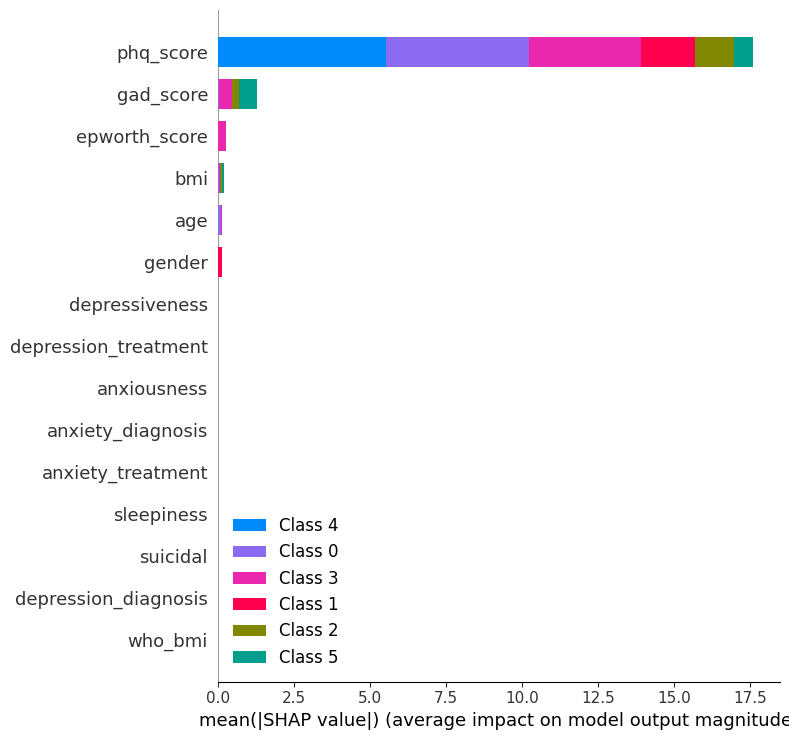

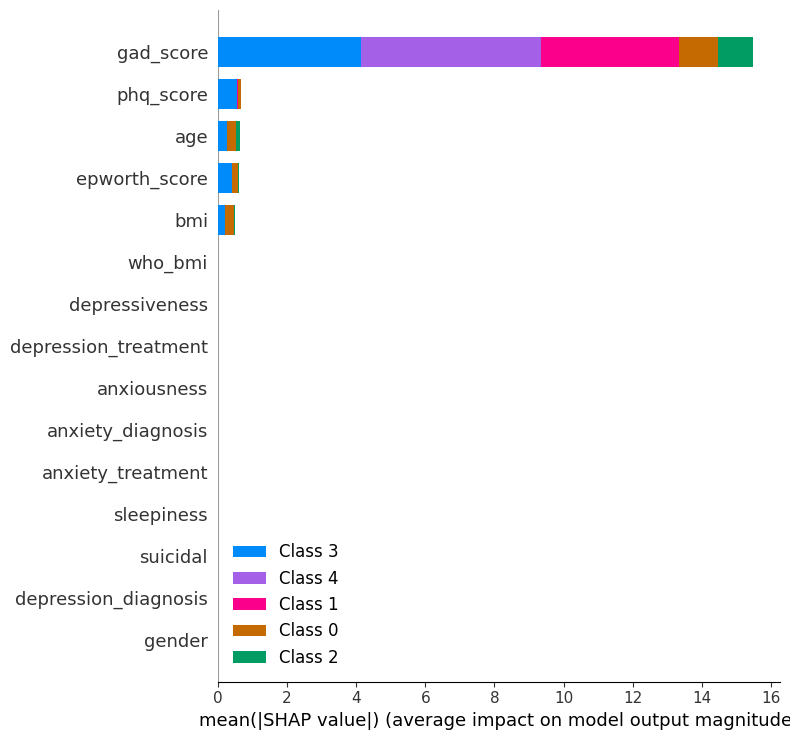

In [167]:
import shap
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Load the trained XGBoost models
xgb_model_depression = joblib.load('xgb_model_depression.pkl')
xgb_model_anxiety = joblib.load('xgb_model_anxiety.pkl')

# Depression and Anxiety Severity Class Mappings
depression_classes = {
    0: "No Depression",
    1: "Mild Depression",
    2: "Moderate Depression",
    3: "Severe Depression",
    4: "Very Severe Depression",
    5: "Extreme Depression"
}

anxiety_classes = {
    0: "No Anxiety",
    1: "Mild Anxiety",
    2: "Moderate Anxiety",
    3: "Severe Anxiety",
    4: "Extreme Anxiety"
}

# SHAP Explainer for XGBoost models
explainer_depression = shap.TreeExplainer(xgb_model_depression)
explainer_anxiety = shap.TreeExplainer(xgb_model_anxiety)

def predict_depression_severity(age, gender, bmi, who_bmi, phq_score, depressiveness, suicidal, depression_diagnosis, depression_treatment, gad_score, anxiousness, anxiety_diagnosis, anxiety_treatment, epworth_score, sleepiness):
    input_data = {
        'age': age,
        'gender': gender,
        'bmi': bmi,
        'who_bmi': who_bmi,
        'phq_score': phq_score,
        'depressiveness': depressiveness,
        'suicidal': suicidal,
        'depression_diagnosis': depression_diagnosis,
        'depression_treatment': depression_treatment,
        'gad_score': gad_score,
        'anxiousness': anxiousness,
        'anxiety_diagnosis': anxiety_diagnosis,
        'anxiety_treatment': anxiety_treatment,
        'epworth_score': epworth_score,
        'sleepiness': sleepiness
    }
    
    # Ensure the input is a DataFrame
    input_df = pd.DataFrame([input_data])
    prediction = xgb_model_depression.predict(input_df)
    
    # SHAP values for the input
    shap_values = explainer_depression.shap_values(input_df)
    
    # Visualizing SHAP summary plot
    shap.summary_plot(shap_values, input_df)
    
    # Map prediction to readable class
    return depression_classes[prediction[0]], input_df, shap_values

def predict_anxiety_severity(age, gender, bmi, who_bmi, phq_score, depressiveness, suicidal, depression_diagnosis, depression_treatment, gad_score, anxiousness, anxiety_diagnosis, anxiety_treatment, epworth_score, sleepiness):
    input_data = {
        'age': age,
        'gender': gender,
        'bmi': bmi,
        'who_bmi': who_bmi,
        'phq_score': phq_score,
        'depressiveness': depressiveness,
        'suicidal': suicidal,
        'depression_diagnosis': depression_diagnosis,
        'depression_treatment': depression_treatment,
        'gad_score': gad_score,
        'anxiousness': anxiousness,
        'anxiety_diagnosis': anxiety_diagnosis,
        'anxiety_treatment': anxiety_treatment,
        'epworth_score': epworth_score,
        'sleepiness': sleepiness
    }
    
    # Ensure the input is a DataFrame
    input_df = pd.DataFrame([input_data])
    prediction = xgb_model_anxiety.predict(input_df)
    
    # SHAP values for the input
    shap_values = explainer_anxiety.shap_values(input_df)
    
    # Visualizing SHAP summary plot
    shap.summary_plot(shap_values, input_df)
    
    # Map prediction to readable class
    return anxiety_classes[prediction[0]], input_df, shap_values

# Example: Get the prediction and SHAP interpretation for one example input
age = 25
gender = 1  # Male
bmi = 22.0
who_bmi = 1  # Normal
phq_score = 5
depressiveness = 0.5
suicidal = 0  # No suicidal thoughts
depression_diagnosis = 0  # No depression diagnosis
depression_treatment = 0  # Not under treatment
gad_score = 3
anxiousness = 0.4
anxiety_diagnosis = 0  # No anxiety diagnosis
anxiety_treatment = 0  # Not under treatment
epworth_score = 6
sleepiness = 0  # Not sleepy

# Predict and visualize for depression
depression_prediction, input_data, shap_values_depression = predict_depression_severity(age, gender, bmi, who_bmi, phq_score, depressiveness, suicidal, depression_diagnosis, depression_treatment, gad_score, anxiousness, anxiety_diagnosis, anxiety_treatment, epworth_score, sleepiness)

# Predict and visualize for anxiety
anxiety_prediction, input_data, shap_values_anxiety = predict_anxiety_severity(age, gender, bmi, who_bmi, phq_score, depressiveness, suicidal, depression_diagnosis, depression_treatment, gad_score, anxiousness, anxiety_diagnosis, anxiety_treatment, epworth_score, sleepiness)
